# Analisis Data Product

In [73]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt


In [74]:
# Load DataSet
Df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')
Df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Analisis Diagnosis

In [94]:
Desc = Df.describe().transpose()
Desc['Type'] = Df.dtypes
Desc

,count,mean,std,min,25%,50%,75%,max,Type
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0,int64
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0,float64
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0,float64


In [95]:
Tanggal_Pesanan = pd.DataFrame(Df['InvoiceDate'].describe())
Tanggal_Pesanan

C:\Users\62858\AppData\Local\Temp\ipykernel_20736\2925928815.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Tanggal_Pesanan = pd.DataFrame(Df['InvoiceDate'].describe())


,InvoiceDate
count,541909
unique,23260
top,2011-10-31 14:41:00
freq,1114
first,2010-12-01 08:26:00
last,2011-12-09 12:50:00


#### Kolom Invoice Date. 
Diketahui dari Data Product yang dimulai dari tanggal 1 Desember 2010 sampai 9 Desember 2011 dengan jumlah pemesanan sebanyak 541909. terdapat jumlah pesanan tertinggi dalam satu hari pada tanggal 31 Oktober 2011 sebanyak 1114 pesanan.

In [81]:
Product_Description = pd.DataFrame(Df['Description'].describe())
Product_Description

,Description
count,540455
unique,4223
top,WHITE HANGING HEART T-LIGHT HOLDER
freq,2369


#### Kolom Description. 
terdapat 4223 item produk dan didapat bahwa item yang paling banyak dipesan adalah :
- item WHITE HANGING HEART T-LIGHT HOLDER sebanyak 2369

In [91]:
pd.DataFrame(Df['Country'].describe())


,Country
count,541909
unique,38
top,United Kingdom
freq,495478


#### Kolom Country. 
terdapat 38 Negara dan didapat bahwa Negara yang paling banyak memesan adalah :
- Unitted Kingdom sebanyak 495478

# Qunatity Distribution

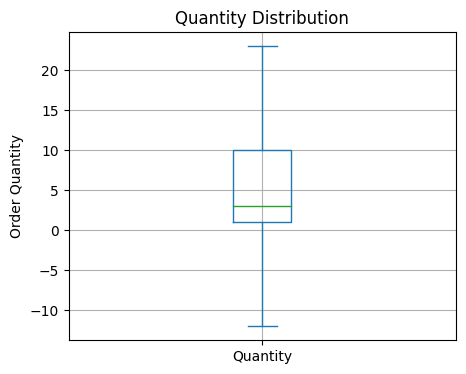

In [96]:
# Distribusi Quantitas
Ax = Df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(5, 4)
)

Ax.set_ylabel('Order Quantity')
Ax.set_title('Quantity Distribution')

plt.suptitle("")
plt.show()

Analisis Grafik Distribusi Quantity Order:

dari grafik diatas dapat disimpulkan bahwa banyaknya pemesanan berulang (repeat order) di angka 1 - 10 dan terdapat nilai minus lebih dari 10.

In [98]:
display(Df.loc[Df['Quantity'] > 0].shape)
display(Df.loc[Df['Quantity'] < 0].shape)

(531285, 8)

(10624, 8)

- Dari jangka waktu selama 375 Hari (2010-12-01 s/d 2011-12-09) untuk order yang berhasil sebanyak 531285.
- Untuk minus order sebanyak 106624. salah satu faktor dapat berupa refund.

# Times Series Number Of Orders

In [99]:
Pesanan_Bulanan = Df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()
Pesanan_Bulanan

InvoiceDate
2010-12-31    2025
2011-01-31    1476
2011-02-28    1393
2011-03-31    1983
2011-04-30    1744
2011-05-31    2162
2011-06-30    2012
2011-07-31    1927
2011-08-31    1737
2011-09-30    2327
2011-10-31    2637
2011-11-30    3462
2011-12-31    1015
Freq: M, Name: InvoiceNo, dtype: int64

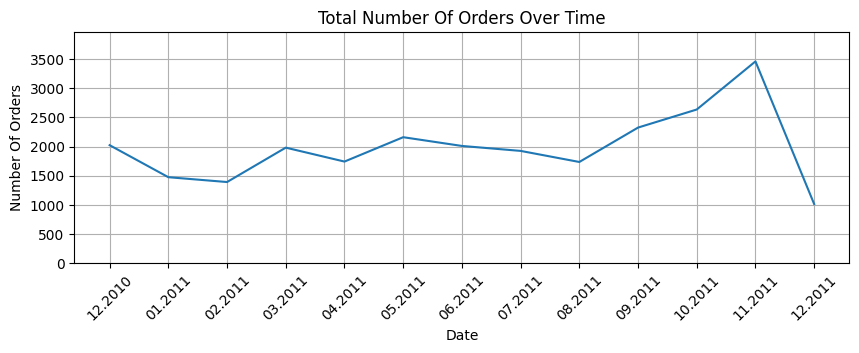

In [103]:
Ax = pd.DataFrame(Pesanan_Bulanan.values).plot(
    grid=True,
    figsize=(10,3),
    legend=False
)

Ax.set_xlabel('Date')
Ax.set_ylabel('Number Of Orders')
Ax.set_title('Total Number Of Orders Over Time')

Ax.set_ylim([0, max(Pesanan_Bulanan.values)+500])

plt.xticks(
    range(len(Pesanan_Bulanan.index)), 
    [x.strftime('%m.%Y') for x in Pesanan_Bulanan.index], 
    rotation=45
)

plt.show()

Dari grafik times series diatas menunjukkan adanya penurunan jumlah order pada bulan Desember dikarenakan pada bulan tersebut hanya 9 hari melakukan order.

# Times Series Revenue

In [104]:
Df['Sales'] = Df['Quantity'] * Df['UnitPrice']
Df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [105]:
Pendapatan_Bulanan = Df.set_index('InvoiceDate')['Sales'].resample('M').sum()
Pendapatan_Bulanan

InvoiceDate
2010-12-31     748957.020
2011-01-31     560000.260
2011-02-28     498062.650
2011-03-31     683267.080
2011-04-30     493207.121
2011-05-31     723333.510
2011-06-30     691123.120
2011-07-31     681300.111
2011-08-31     682680.510
2011-09-30    1019687.622
2011-10-31    1070704.670
2011-11-30    1461756.250
2011-12-31     433668.010
Freq: M, Name: Sales, dtype: float64

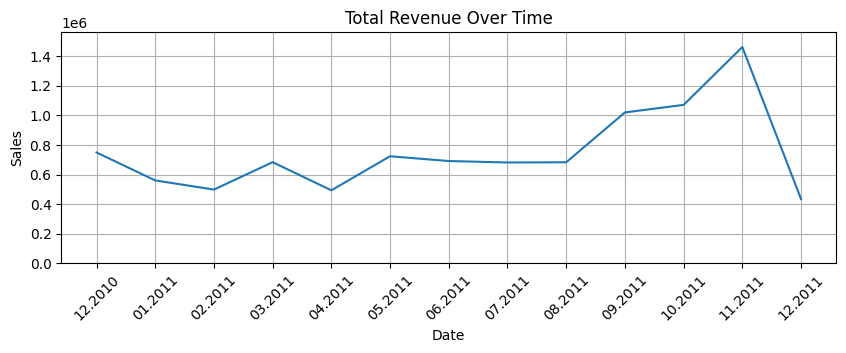

In [107]:
Ax = pd.DataFrame(Pendapatan_Bulanan.values).plot(
    grid=True,
    figsize=(10,3),
    legend=False
)

Ax.set_xlabel('Date')
Ax.set_ylabel('Sales')
Ax.set_title('Total Revenue Over Time')

Ax.set_ylim([0, max(Pendapatan_Bulanan.values)+100000])

plt.xticks(
    range(len(Pendapatan_Bulanan.index)), 
    [x.strftime('%m.%Y') for x in Pendapatan_Bulanan.index], 
    rotation=45
)

plt.show()